In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import ta
import evaluation
import strategy

In [2]:
data = yf.download(
    "SPY",
    start="1990-01-01",
    end="2021-01-01",
    auto_adjust = True,
    group_by="Ticker",
)

[*********************100%***********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Volume
Date,,,,,
1993-01-29,25.735668,25.735668,25.607630,25.717377,1003200
1993-02-01,25.735675,25.900295,25.735675,25.900295,480500
1993-02-02,25.881988,25.973444,25.827114,25.955153,201300
1993-02-03,25.991743,26.247820,25.973452,26.229528,529400
1993-02-04,26.320988,26.394153,26.028329,26.339279,531500
...,...,...,...,...,...
2020-12-24,364.514223,365.455032,363.890351,365.425323,26457900
2020-12-28,368.138779,368.980551,367.475286,368.564636,39000400
2020-12-29,370.188721,370.376883,367.237579,367.861481,53680500


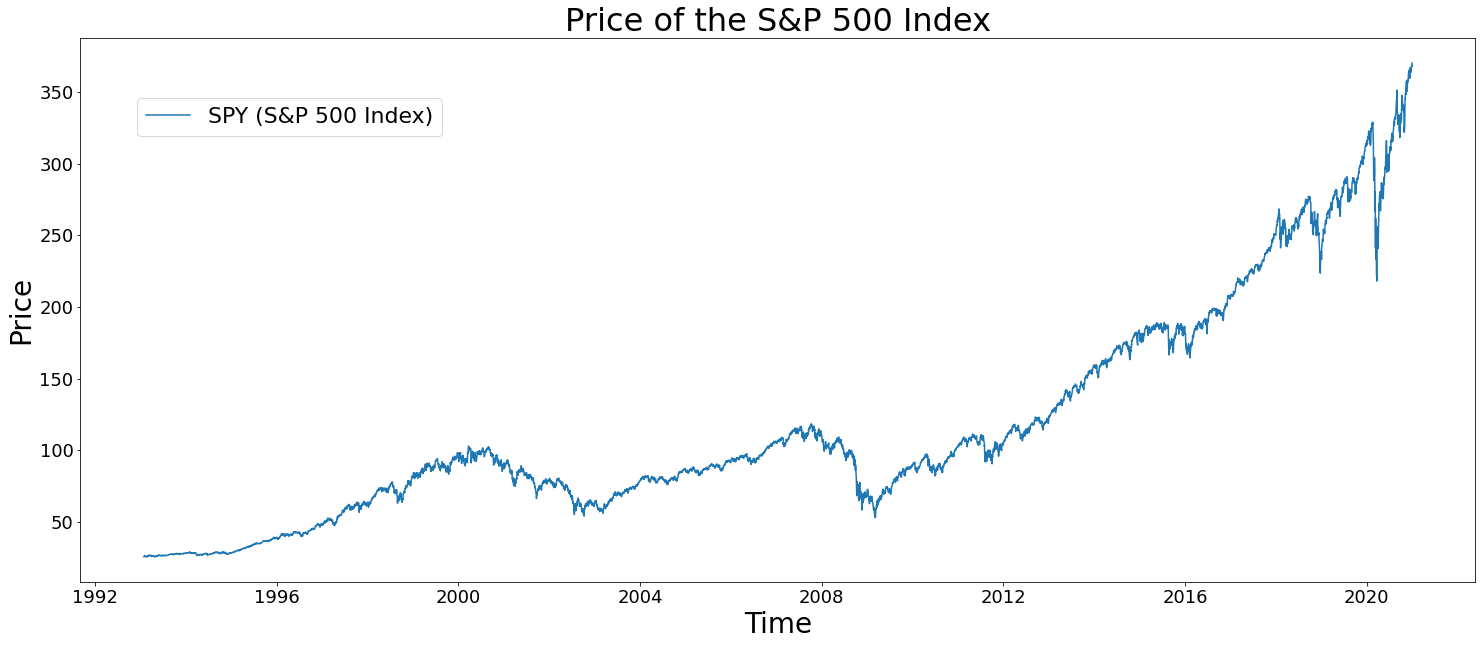

In [19]:
plt.figure(figsize=(25,10))

plt.plot(data['Close'], label='SPY (S&P 500 Index)')

plt.legend(loc='lower center', bbox_to_anchor=(0.15, 0.8), fontsize=22)

plt.title('Price of the S&P 500 Index', fontsize=32)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time', fontsize=28)
plt.ylabel('Price', fontsize=28)

plt.show()

In [5]:
def split(data):
    test_size = int(len(data) * 0.2)
    valid_size = test_size
    train_size = len(data) - test_size - valid_size
    
    train = data[:train_size]
    valid = data[train_size:train_size+valid_size]
    test = data[train_size+valid_size:]
    
    return (train, valid, test)

In [6]:
train, valid, test = split(data)

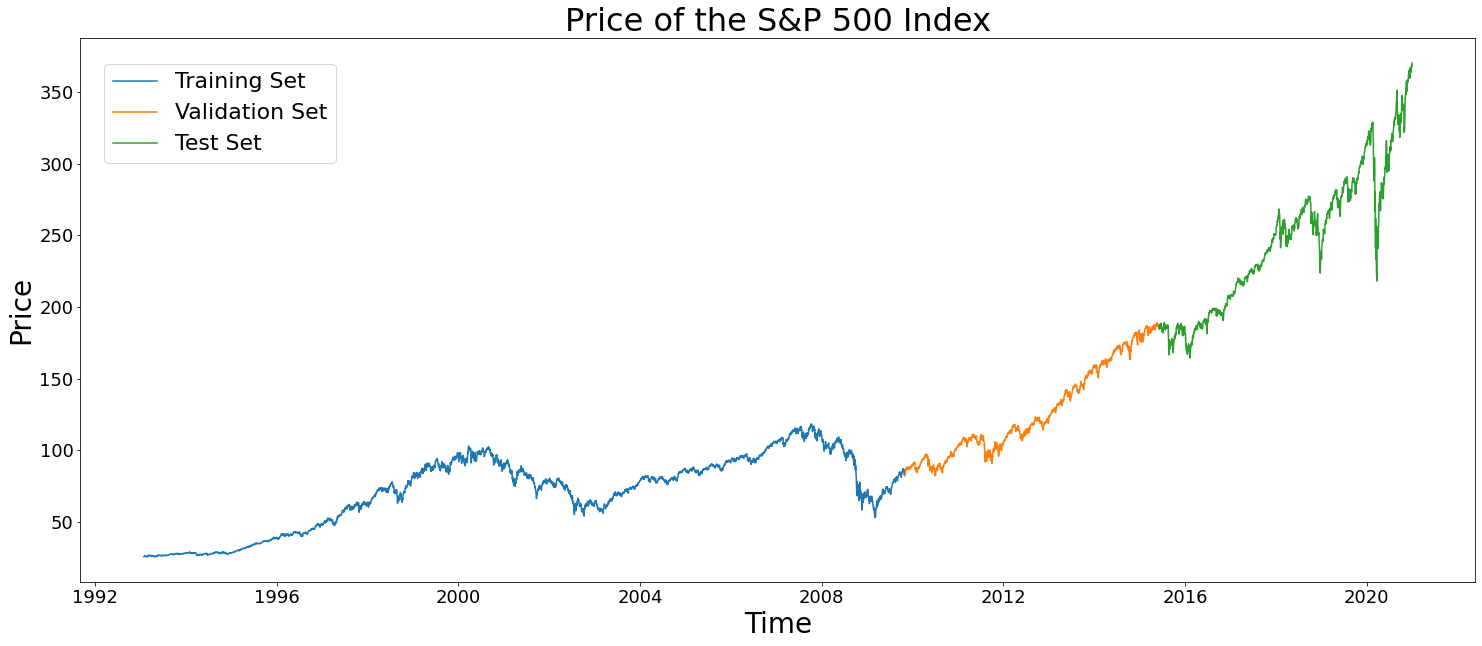

In [12]:
plt.figure(figsize=(25,10))

plt.plot(train['Close'], label='Training Set')
plt.plot(valid['Close'], label='Validation Set')
plt.plot(test['Close'], label='Test Set')

plt.legend(loc='lower center', bbox_to_anchor=(0.1, 0.75), fontsize=22)

plt.title('Price of the S&P 500 Index', fontsize=32)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time', fontsize=28)
plt.ylabel('Price', fontsize=28)

plt.show()